# I] Import and options


In [1]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [7]:
path = output_file_directory + "ATG7/MEF_HuH7/Seahorse_results/"

# II] DL data

## A) Extracellular Acidification Rate 

In [28]:
%%time
file_names = "ecar_exp1_df_", "ecar_exp2_df_", "ecar_exp3_df_"
all_conditions = "dmso", "baf"
lvl_studied = '_glycolysis', '_max_glycolysis', '_negative_ctl'

ecar_exps = []
#for basal and maximum
for level in lvl_studied:
    #for DMSO and BAF
    for condition in all_conditions:
        #For experiment 1, 2 and 3
        for file_name in file_names: 
            #download data
            path2 = f'/seahorse_ECAR/dataframes_for_input/{file_name}{condition}{level}.csv'
            df_ori = pandas.read_csv(path+path2, sep = ",")
            
            #create normalized columns and rename
            df = df_ori.assign(EV_dox_ctl= df_ori['Empty Vector +dox']/ df_ori['Empty Vector -dox'],
                               EV_norm= df_ori['Empty Vector +dox']/ df_ori['Empty Vector +dox'],
                               ATG7_1norm= df_ori['ATG7(1)']/ df_ori['Empty Vector +dox'],
                               ATG7_2norm= df_ori['ATG7(2)']/ df_ori['Empty Vector +dox'])
            
            #add what experiment it is + condition + level
            df['exp'] = file_name.split('_')[1]
            df['condition'] = condition
            df['level studied'] = level.split('_')[1]

            df = df.iloc[:,6:] #select the 4 normalized columns
            df = df.rename(columns = {'EV_dox_ctl' : 'MEF dox control', 
                                      'ATG7_1norm' : 'ATG7(1)',
                                      'ATG7_2norm' : 'ATG7(2)'})
            df['Empty Vector -dox'] = df_ori['Empty Vector -dox']
            df['Empty Vector +dox'] = df_ori['Empty Vector +dox']
            ecar_exps.append(df)

recap_ecar_dmso_glyco = pandas.concat([ecar_exps[0], ecar_exps[1], ecar_exps[2]], axis=0)
recap_ecar_baf_glyco = pandas.concat([ecar_exps[3], ecar_exps[4], ecar_exps[5]], axis=0)
recap_ecar_dmso_max_glyco = pandas.concat([ecar_exps[6], ecar_exps[7], ecar_exps[8]], axis=0)
recap_ecar_baf_max_glyco = pandas.concat([ecar_exps[9], ecar_exps[10], ecar_exps[11]], axis=0)
recap_ecar_dmso_negativ = pandas.concat([ecar_exps[12], ecar_exps[13], ecar_exps[14]], axis=0)
recap_ecar_baf_negativ = pandas.concat([ecar_exps[15], ecar_exps[16], ecar_exps[17]], axis=0)

print(df_ori.iloc[:,1:].head())
print(df.iloc[:,:].head())

   Normal MEF  Empty Vector -dox  Empty Vector +dox   ATG7(1)   ATG7(2)
0    2.559002           1.970843           2.762165  2.065808  1.999403
1    2.312984           1.806076           2.560004  1.871420  1.870915
2    2.227229           1.822200           2.477982  1.816760  1.817666
   MEF dox control  EV_norm   ATG7(1)   ATG7(2)   exp condition level studied  \
0         1.401515      1.0  0.747894  0.723854  exp3       baf      negative   
1         1.417439      1.0  0.731022  0.730825  exp3       baf      negative   
2         1.359885      1.0  0.733161  0.733527  exp3       baf      negative   

   Empty Vector -dox  Empty Vector +dox  
0           1.970843           2.762165  
1           1.806076           2.560004  
2           1.822200           2.477982  
Wall time: 120 ms


### 1) Statistic

In [30]:
dfs = recap_ecar_dmso_glyco, recap_ecar_baf_glyco, recap_ecar_dmso_max_glyco, recap_ecar_baf_max_glyco
infos = 'DMSO_glycoysis', 'BAF_glycoysis', 'DMSO_max_capacity', 'BAF_max_capacity'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    print(info.upper())

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df['Empty Vector +dox'], df['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue no dox vs dox is {Pvalue}')
    
    #isoform1 vs ev
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(1)'], df['EV_norm'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue ATG7(1) vs dox is {Pvalue}')    
    
    #isoform2 vs ev
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(2)'], df['EV_norm'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue ATG7(2) vs dox is {Pvalue}')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(1)'], df['ATG7(2)'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue: ATG7(1) vs ATG7(2) is {Pvalue}\n')

DMSO_GLYCOYSIS
pvalue no dox vs dox is 1.853E-01
pvalue ATG7(1) vs dox is 1.610E-04
pvalue ATG7(2) vs dox is 1.610E-04
pvalue: ATG7(1) vs ATG7(2) is 4.123E-04

BAF_GLYCOYSIS
pvalue no dox vs dox is 1.000E+00
pvalue ATG7(1) vs dox is 2.201E-01
pvalue ATG7(2) vs dox is 1.610E-04
pvalue: ATG7(1) vs ATG7(2) is 4.123E-04

DMSO_MAX_CAPACITY
pvalue no dox vs dox is 5.206E-02
pvalue ATG7(1) vs dox is 1.610E-04
pvalue ATG7(2) vs dox is 3.795E-02
pvalue: ATG7(1) vs ATG7(2) is 4.123E-04

BAF_MAX_CAPACITY
pvalue no dox vs dox is 8.598E-01
pvalue ATG7(1) vs dox is 7.059E-01
pvalue ATG7(2) vs dox is 1.610E-04
pvalue: ATG7(1) vs ATG7(2) is 4.123E-04



In [32]:
dfs = recap_ecar_dmso_glyco, recap_ecar_baf_glyco, recap_ecar_dmso_max_glyco, recap_ecar_baf_max_glyco
infos = 'DMSO_glycoysis', 'BAF_glycoysis', 'DMSO_max_capacity', 'BAF_max_capacity'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    print(info.upper())

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df['Empty Vector +dox'], df['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue no dox vs dox is {Pvalue}')
    
    #isoform vs ev
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(1)'], df['Empty Vector +dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue ATG7(1) vs EV is {Pvalue}')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(1)'], df['ATG7(2)'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue: ATG7(1) vs ATG7(2) is {Pvalue}\n')

DMSO_GLYCOYSIS
pvalue no dox vs dox is 1.853E-01
pvalue ATG7(1) vs EV is 4.123E-04
pvalue: ATG7(1) vs ATG7(2) is 4.123E-04

BAF_GLYCOYSIS
pvalue no dox vs dox is 1.000E+00
pvalue ATG7(1) vs EV is 4.123E-04
pvalue: ATG7(1) vs ATG7(2) is 4.123E-04

DMSO_MAX_CAPACITY
pvalue no dox vs dox is 5.206E-02
pvalue ATG7(1) vs EV is 4.123E-04
pvalue: ATG7(1) vs ATG7(2) is 4.123E-04

BAF_MAX_CAPACITY
pvalue no dox vs dox is 8.598E-01
pvalue ATG7(1) vs EV is 4.123E-04
pvalue: ATG7(1) vs ATG7(2) is 4.123E-04



### 2) Graph for controls

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


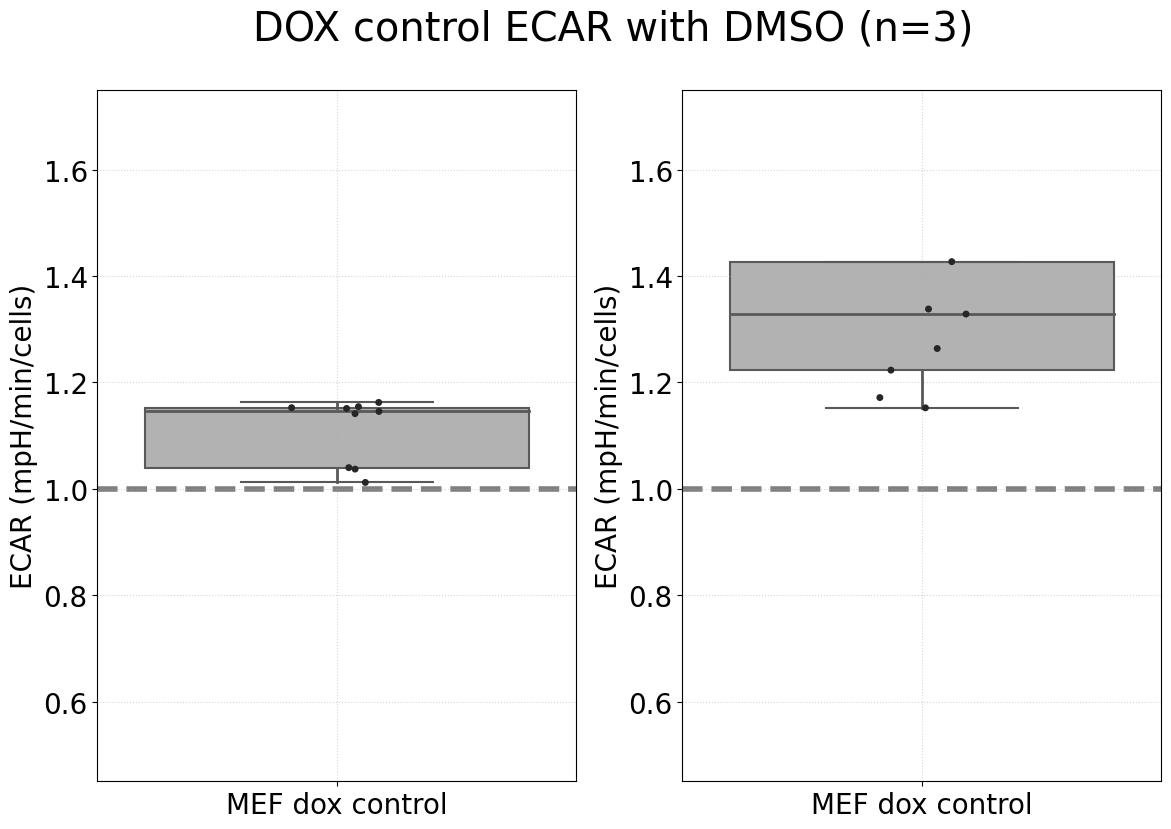

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


<Figure size 1200x800 with 0 Axes>

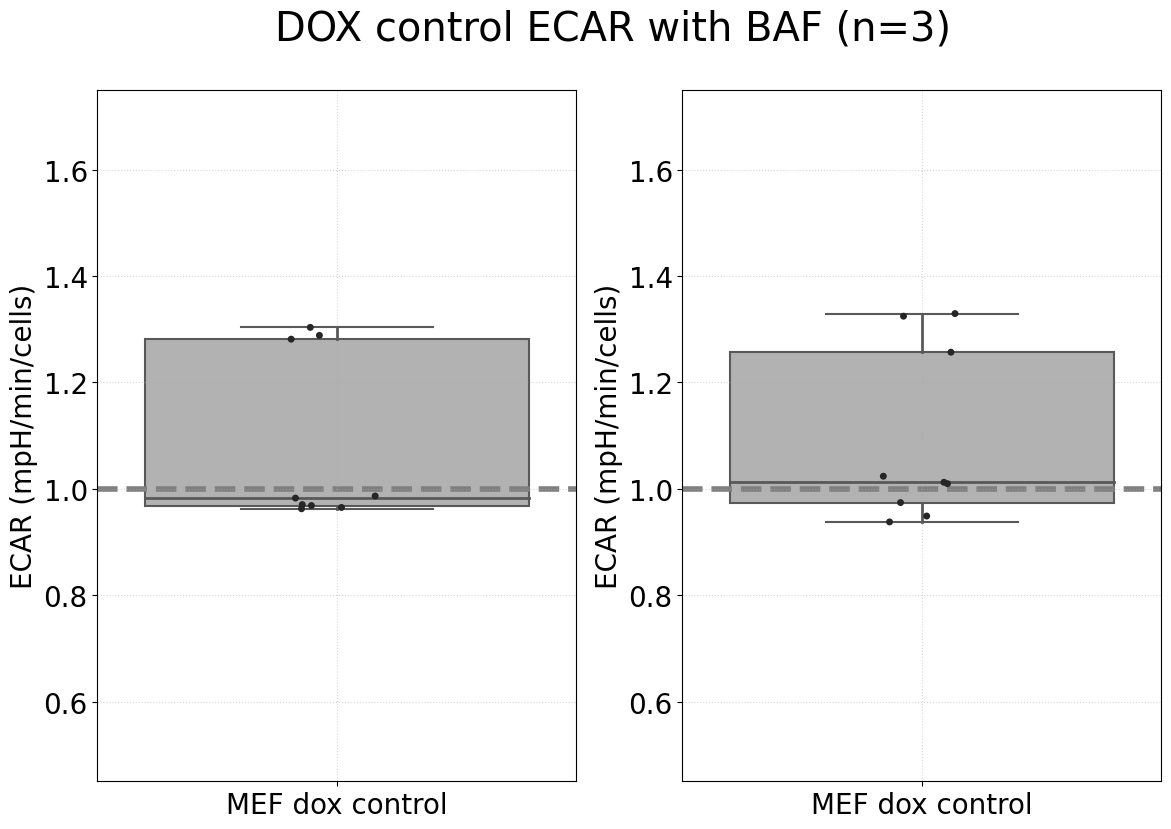

<Figure size 1200x800 with 0 Axes>

In [13]:
# BASAL LEVEL RATE
dfs_glyc = recap_ecar_dmso_glyco, recap_ecar_baf_glyco
dfs_max = recap_ecar_dmso_max_glyco, recap_ecar_baf_max_glyco
infos = 'DMSO', 'BAF'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i]
    df_max = dfs_max[i]
    info = infos[i]

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'DOX control ECAR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for DMSO
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df_glyco.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df_glyco.iloc[:,0:1], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('ECAR (mpH/min/cells)')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))
    
    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.75)


    #graph for BAF
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df_max.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df_max.iloc[:,0:1], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('ECAR (mpH/min/cells)')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))
        
    fig.grid(alpha = 0.5, ls = ":")
#     fig.set_ylim(0.45,1.75)

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.75)
                
    # save
    path2 = 'seahorse_ECAR/'
    text_file = 'graph_all_ecar_final_'+info
#     plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

### 3) Graph for isoforms

In [51]:
# BASAL LEVEL RATE
dfs_glyc = recap_ecar_dmso_glyco, recap_ecar_baf_glyco
dfs_max = recap_ecar_dmso_max_glyco, recap_ecar_baf_max_glyco
dfs_negative = recap_ecar_dmso_negativ, recap_ecar_baf_negativ
infos = 'DMSO', 'BAF'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i][['ATG7(1)', 'ATG7(2)']]
    df_max = dfs_max[i][['ATG7(1)', 'ATG7(2)']]
    df_neg = dfs_negative[i][['ATG7(1)', 'ATG7(2)']]
    info = infos[i]

In [52]:
df_glyco

,ATG7(1),ATG7(2)
0,1.269556,0.793066
1,1.284875,0.777539
2,1.275351,0.772211
0,1.136594,0.610952
1,1.094784,0.607624
2,1.065271,0.594513
0,0.882692,0.721396
1,0.826538,0.701985
2,0.823172,0.705391


In [54]:
df_neg

,ATG7(1),ATG7(2)
0,1.587120,0.889429
1,1.474286,0.851568
2,1.352353,0.833458
0,1.404525,0.686459
1,1.302500,0.655195
2,1.235257,0.612344
0,0.747894,0.723854
1,0.731022,0.730825
2,0.733161,0.733527


C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)


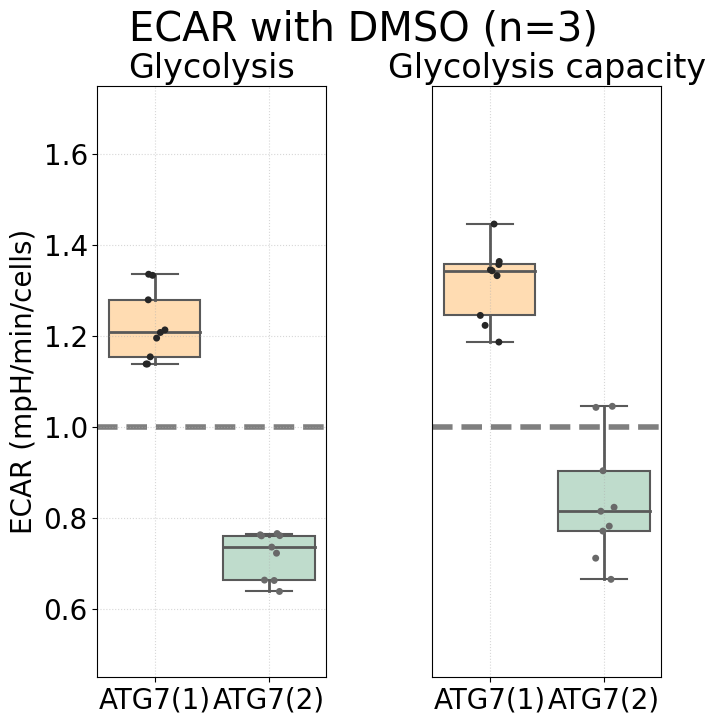

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)


<Figure size 1200x800 with 0 Axes>

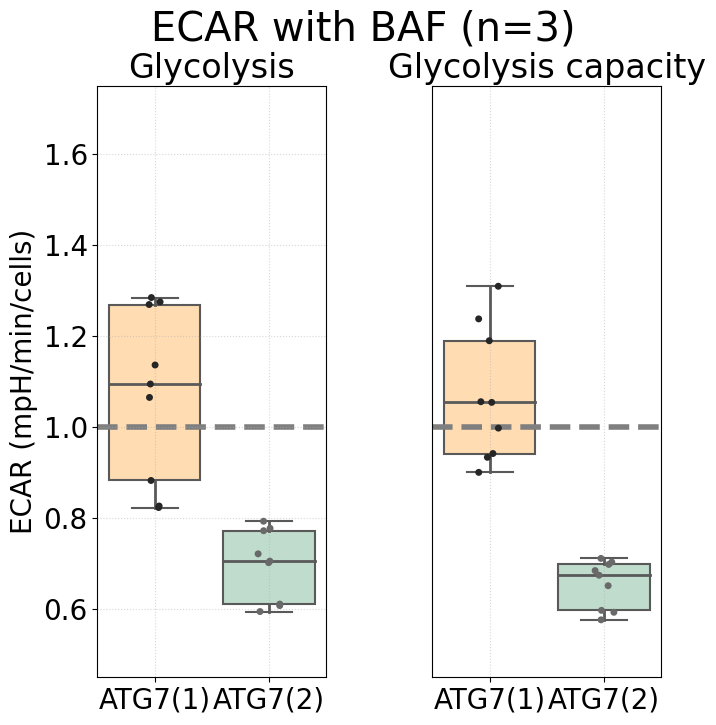

<Figure size 1200x800 with 0 Axes>

In [48]:
# BASAL LEVEL RATE
dfs_glyc = recap_ecar_dmso_glyco, recap_ecar_baf_glyco
dfs_max = recap_ecar_dmso_max_glyco, recap_ecar_baf_max_glyco
dfs_negative = recap_ecar_dmso_negativ, recap_ecar_baf_negativ
infos = 'DMSO', 'BAF'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i][['ATG7(1)', 'ATG7(2)']]
    df_max = dfs_max[i][['ATG7(1)', 'ATG7(2)']]
    df_neg = dfs_negative[i][['ATG7(1)', 'ATG7(2)']]
    info = infos[i]


    
    
    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2, figsize=(7, 7))
    plt.tight_layout()
    fig.suptitle(f'ECAR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for GLYCOLYSIS
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df_glyco.iloc[:,2:4], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df_glyco.iloc[:,2:4], color = 'dimgray')
    
    fig.set_title('Glycolysis')
    fig.set_xlabel('')
    fig.set_ylabel('ECAR (mpH/min/cells)')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.75)


    #graph for MAXIMUM CAPACITY
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df_max.iloc[:,2:4], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df_max.iloc[:,2:4], color = 'dimgray')
   
    fig.set_title('Glycolysis capacity')
    fig.set_xlabel('')
    fig.set_ylabel('')
    fig.set_yticks([])

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.75)
                
    # save
    path2 = 'seahorse_ECAR/'
    text_file = 'graph_all_ecar_final_'+info
#     plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

In [ ]:
recap_ecar_dmso_glyco
recap_ecar_dmso_max_glyco
recap_ecar_dmso_negativ

In [40]:
recap_ecar_dmso_negativ

,MEF dox control,EV_norm,ATG7(1),ATG7(2),exp,condition,level studied,Empty Vector -dox,Empty Vector +dox
0,0.961700,1.0,1.100656,0.574034,exp1,dmso,negative,4.752000,4.570000
1,0.965963,1.0,1.140577,0.540209,exp1,dmso,negative,4.216000,4.072500
2,0.909840,1.0,1.158473,0.521345,exp1,dmso,negative,4.248000,3.865000
0,1.164632,1.0,0.912260,0.539681,exp2,dmso,negative,4.591667,5.347600
1,1.140179,1.0,0.930352,0.530124,exp2,dmso,negative,4.012000,4.574400
2,1.091561,1.0,0.942746,0.527540,exp2,dmso,negative,3.878667,4.233800
0,0.733241,1.0,1.498052,0.721247,exp3,dmso,negative,2.885470,2.115745
1,0.821192,1.0,1.403799,0.749863,exp3,dmso,negative,2.360826,1.938690
2,0.729466,1.0,1.364533,0.754863,exp3,dmso,negative,2.544731,1.856295


In [46]:
recap_ecar_dmso_negativ[['ATG7(1)', 'ATG7(2)']]

,ATG7(1),ATG7(2)
0,1.100656,0.574034
1,1.140577,0.540209
2,1.158473,0.521345
0,0.912260,0.539681
1,0.930352,0.530124
2,0.942746,0.527540
0,1.498052,0.721247
1,1.403799,0.749863
2,1.364533,0.754863


In [ ]:
tst = recap_ecar_dmso_max_glyco[['ATG7(1)', 'ATG7(2)']]
tst = tst - 


In [ ]:
# BASAL LEVEL RATE
dfs_glyc = recap_ecar_dmso_glyco, recap_ecar_baf_glyco
dfs_max = recap_ecar_dmso_max_glyco, recap_ecar_baf_max_glyco
dfs_negative = recap_ecar_dmso_negativ, recap_ecar_baf_negativ
infos = 'DMSO', 'BAF'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i]
    df_max = dfs_max[i]
    df_neg = dfs_negative[i]
    info = infos[i]

    tst = df_glyco[[iso1]] - df_neg[iso1]

In [ ]:
tst = recap_ecar_dmso_max_glyco[]

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)


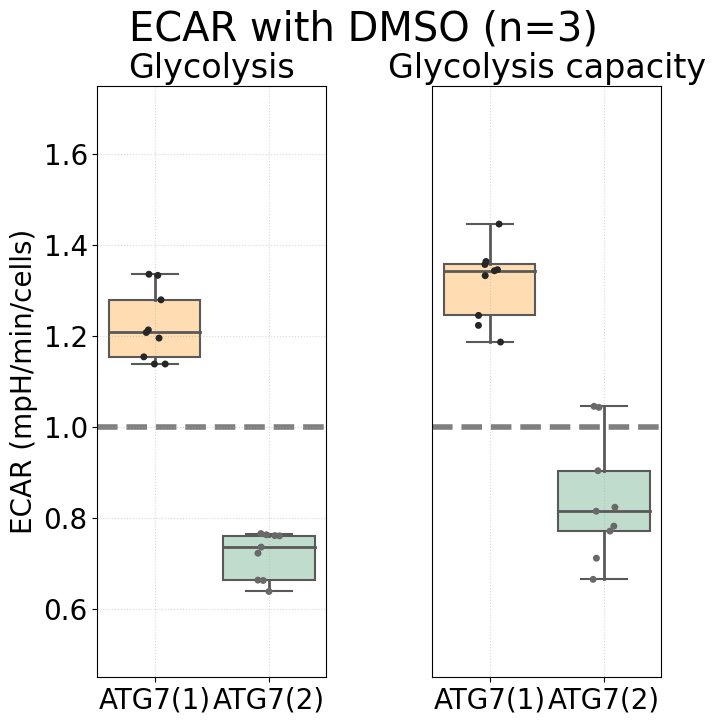

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)


<Figure size 1200x800 with 0 Axes>

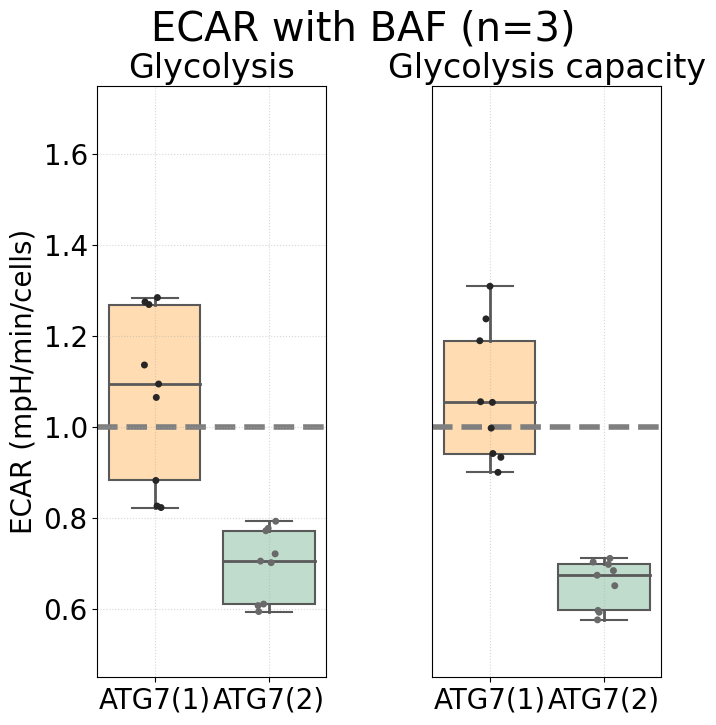

<Figure size 1200x800 with 0 Axes>

In [24]:
# BASAL LEVEL RATE
dfs_glyc = recap_ecar_dmso_glyco, recap_ecar_baf_glyco
dfs_max = recap_ecar_dmso_max_glyco, recap_ecar_baf_max_glyco
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i]
    df_max = dfs_max[i]
    info = infos[i]

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2, figsize=(7, 7))
    plt.tight_layout()
    fig.suptitle(f'ECAR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for GLYCOLYSIS
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df_glyco.iloc[:,2:4], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df_glyco.iloc[:,2:4], color = 'dimgray')
    
    fig.set_title('Glycolysis')
    fig.set_xlabel('')
    fig.set_ylabel('ECAR (mpH/min/cells)')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.75)


    #graph for MAXIMUM CAPACITY
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df_max.iloc[:,2:4], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df_max.iloc[:,2:4], color = 'dimgray')
   
    fig.set_title('Glycolysis capacity')
    fig.set_xlabel('')
    fig.set_ylabel('')
    fig.set_yticks([])

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,1.75)
                
    # save
    path2 = 'seahorse_ECAR/'
    text_file = 'graph_all_ecar_final_'+info
#     plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

#### Glycolysis (relative to shCtrl-expressing cells) was calculated as “average ECAR following glucose addition minus average ECAR following inhibition of glycolysis using 2-DG.” Relative mitochondrial respiration was calculated as “basal OCR minus OCR following antimycin and rotenone (ETC inhibitors) treatment

## B) Oxygen Consumption Rate 

In [28]:
%%time
file_names = "ocr_exp2_df_", "ocr_exp7_df_", "ocr_exp12_df_", "ocr_exp13_df_"
all_conditions = "dmso", "baf"
lvl_studied = '_basal', '_maximum'

ocr_exps = []
#for basal and maximum
for level in lvl_studied:
    #for DMSO and BAF
    for condition in all_conditions:
        #For experiment 1, 2 and 3
        for file_name in file_names: 
            #download data
            path2 = f'seahorse_OCR/dataframes_for_input/{file_name}{condition}{level}.csv'
            df_ori = pandas.read_csv(path+path2, sep = ",")
            #create normalized columns and rename
            df = df_ori.assign(EV_dox_ctl= df_ori['Empty Vector +dox']/ df_ori['Empty Vector -dox'],
                               ATG7_1norm= df_ori['ATG7(1)']/ df_ori['Empty Vector +dox'],
                               ATG7_2norm= df_ori['ATG7(2)']/ df_ori['Empty Vector +dox'])
            df['exp'] = file_name.split('_')[1]
            df['condition'] = condition
            df['level studied'] = level.split('_')[1]
            df = df.iloc[:,5:] #select the 3 normalized columns
            df = df.rename(columns = {'EV_dox_ctl' : 'MEF dox control', 
                                      'ATG7_1norm' : 'ATG7(1)',
                                      'ATG7_2norm' : 'ATG7(2)'})
            ocr_exps.append(df)

#basal level in experiment 12 is not good. Not stable, go down. I remove it
recap_ocr_dmso_basal = pandas.concat([ocr_exps[0], ocr_exps[1], ocr_exps[3]], axis=0)
recap_ocr_baf_basal = pandas.concat([ocr_exps[4], ocr_exps[5], ocr_exps[7]], axis=0)
recap_ocr_dmso_max = pandas.concat([ocr_exps[8], ocr_exps[9], ocr_exps[10], ocr_exps[11]], axis=0)
recap_ocr_baf_max = pandas.concat([ocr_exps[12], ocr_exps[13], ocr_exps[14], ocr_exps[15]], axis=0)

print(recap_ocr_dmso_basal, '\n', recap_ocr_baf_basal)

   MEF dox control   ATG7(1)   ATG7(2)    exp condition level studied
0         0.666695  1.458469  1.494814   exp2      dmso         basal
1         0.678680  1.486579  1.504491   exp2      dmso         basal
2         0.679001  1.494178  1.513714   exp2      dmso         basal
3         0.678113  1.494656  1.509662   exp2      dmso         basal
4         0.679087  1.494944  1.502106   exp2      dmso         basal
5         0.676222  1.490811  1.499106   exp2      dmso         basal
0         1.329883  1.108199  0.502076   exp7      dmso         basal
1         1.262581  1.149208  0.553143   exp7      dmso         basal
2         1.245307  1.133166  0.573492   exp7      dmso         basal
3         1.206674  1.145803  0.579330   exp7      dmso         basal
4         1.168701  1.144112  0.586895   exp7      dmso         basal
5         1.149549  1.199558  0.617820   exp7      dmso         basal
0         0.889392  1.306731  0.927185  exp13      dmso         basal
1         0.916289  

### 1) Basal level rate

the pvalue between no dox and dox with DMSO is 3.313E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, DMSO is 4.233E-02


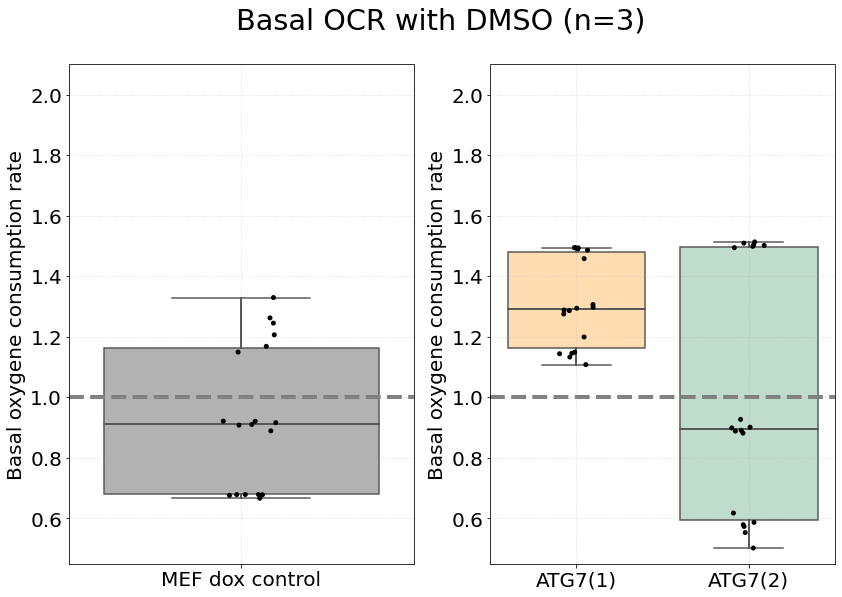

the pvalue between no dox and dox with BAF is 3.313E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, BAF is 1.588E-05


<Figure size 864x576 with 0 Axes>

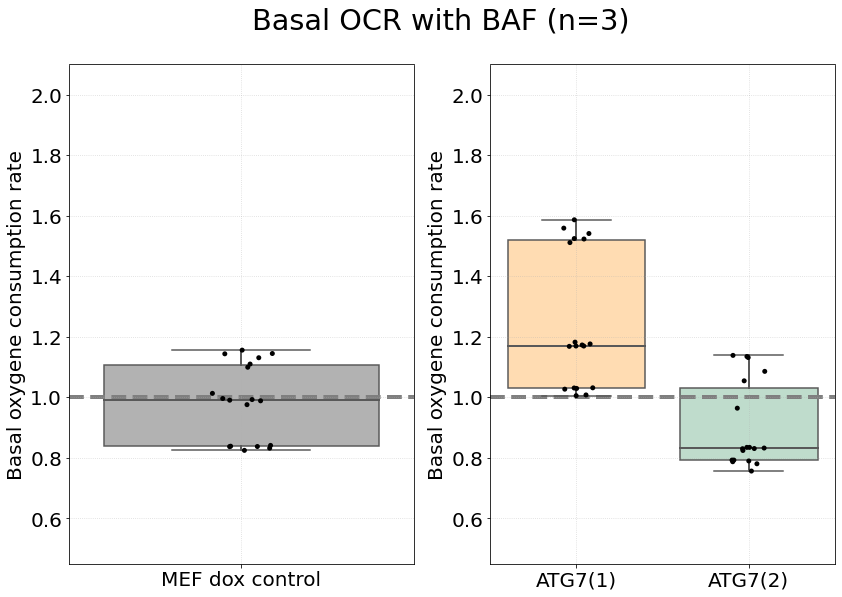

<Figure size 864x576 with 0 Axes>

In [29]:
# BASAL LEVEL RATE
dfs = recap_ocr_dmso_basal, recap_ocr_baf_basal
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ori['Empty Vector +dox'], df_ori['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between no dox and dox with {info} is {Pvalue} for basal level rate')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between ATG7(1) and ATG7(2) with, {info} is {Pvalue}')

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'Basal OCR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for controls
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('Basal oxygene consumption rate')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)


    #graph for ATG7(1) vs ATG7(2)
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:], color = 'k')
   
    fig.set_xlabel('')
    fig.set_ylabel('Basal oxygene consumption rate')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)
                
    # save
    path2 = 'seahorse_OCR/'
    text_file = 'graph_all_ocr_basal_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

### 2) Maximal level rate

the pvalue between no dox and dox with DMSO is 3.313E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, DMSO is 5.097E-03


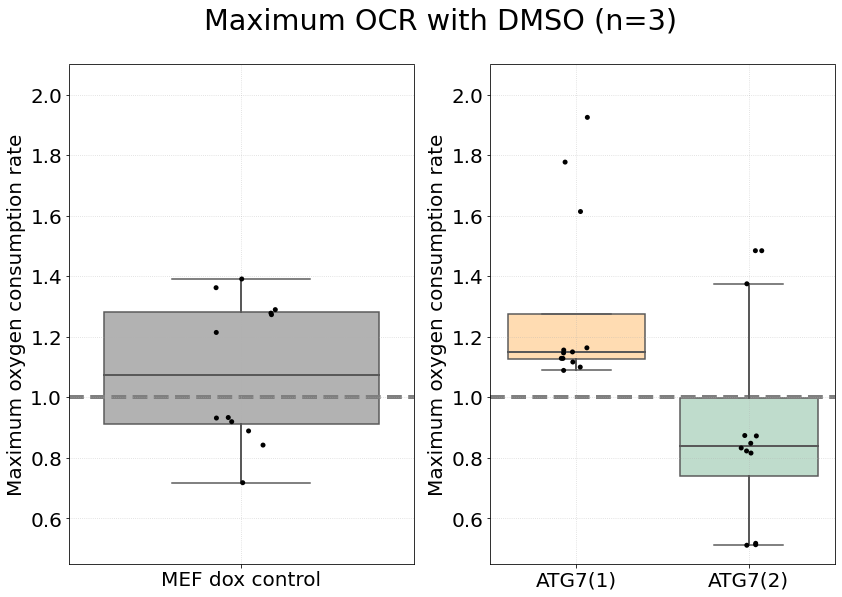

the pvalue between no dox and dox with BAF is 3.313E-01 for basal level rate
the pvalue between ATG7(1) and ATG7(2) with, BAF is 1.829E-05


<Figure size 864x576 with 0 Axes>

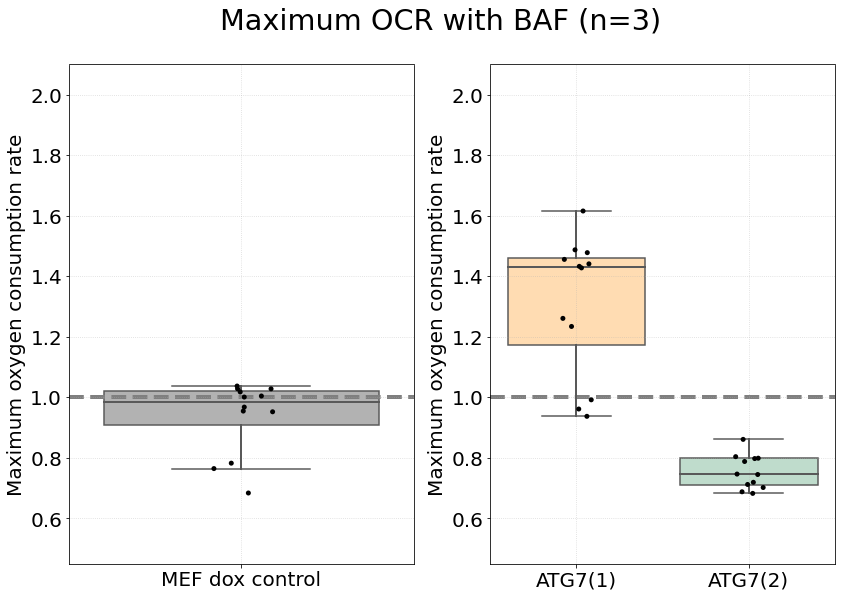

<Figure size 864x576 with 0 Axes>

In [30]:
# BASAL LEVEL RATE
dfs = recap_ocr_dmso_max, recap_ocr_baf_max
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ori['Empty Vector +dox'], df_ori['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between no dox and dox with {info} is {Pvalue} for basal level rate')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between ATG7(1) and ATG7(2) with, {info} is {Pvalue}')

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'Maximum OCR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for controls
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('Maximum oxygen consumption rate')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)


    #graph for ATG7(1) vs ATG7(2)
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:], color = 'k')
   
    fig.set_xlabel('')
    fig.set_ylabel('Maximum oxygen consumption rate')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)
                
    # save
    path2 = 'seahorse_OCR/'
    text_file = 'graph_all_ocr_maximum_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()